# Pymaceuticals Inc.
---

### Analysis

- This project involves analyzing a real-world dataset from Pymaceuticals, Inc., a pharmaceutical company specializing in anti-cancer medications. The dataset consists of data from an animal study that aimed to find potential treatments for squamous cell carcinoma (SCC), a form of skin cancer.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_results_complete = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")


# Display the data table for preview
study_results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(study_results_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_results_complete.loc[study_results_complete.duplicated(['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_results_complete.loc[study_results_complete["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = study_results_complete.groupby('Drug Regimen')
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = study_results_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

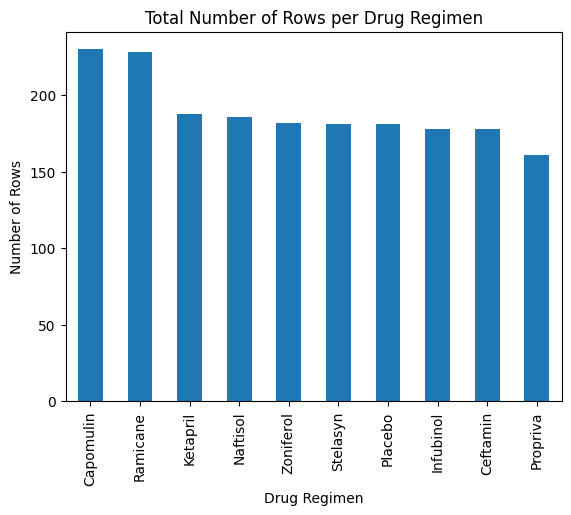

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = study_results_complete['Drug Regimen'].value_counts()

drug_counts.plot.bar()

import matplotlib.pyplot as plt

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()


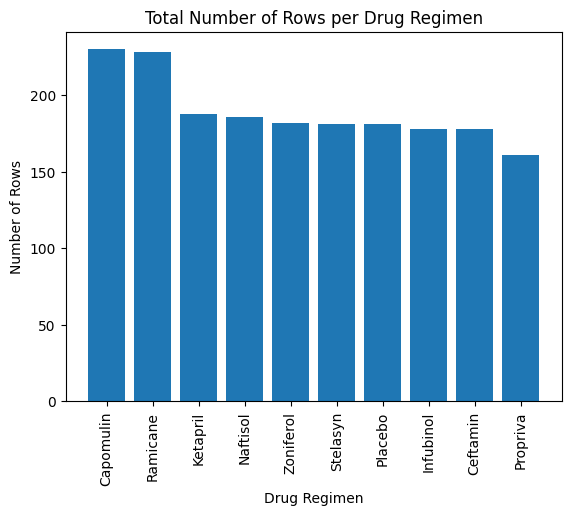

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = study_results_complete['Drug Regimen'].value_counts()

import matplotlib.pyplot as plt

plt.bar(drug_counts.index, drug_counts.values)

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()


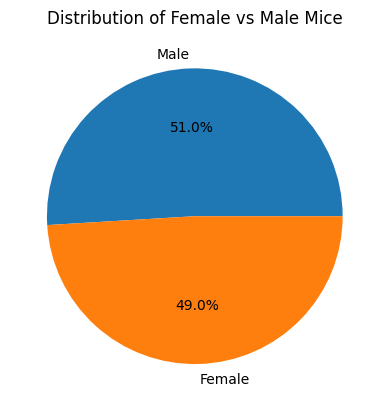

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()

gender_counts.plot.pie(autopct='%1.1f%%')

import matplotlib.pyplot as plt

plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove the y-axis label
plt.show()


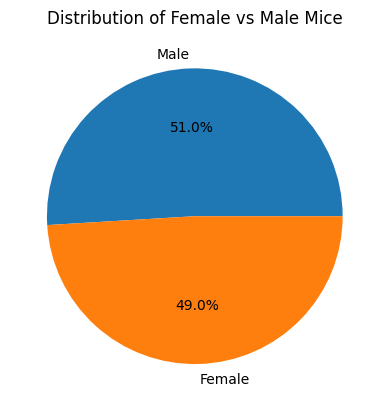

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_df['Sex'].value_counts()

import matplotlib.pyplot as plt

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_timepoint = study_results_complete.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume_df = pd.DataFrame(max_timepoint)

final_tumor_volume_df = final_tumor_volume_df.merge(study_results_complete, on=['Mouse ID', 'Timepoint'], how='left')

desired_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(desired_regimens)]
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []  

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumess
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles (25th, 50th, and 75th percentiles) of the tumor volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds to identify any potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
        
    
    # Use the lower and upper bounds to locate any potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the treatment regimen and the number of potential outliers
    print(f'Treatment: {treatment}, Potential outliers: {outliers}')
    

Treatment: Capomulin, Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Ramicane, Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Infubinol, Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Treatment: Ceftamin, Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


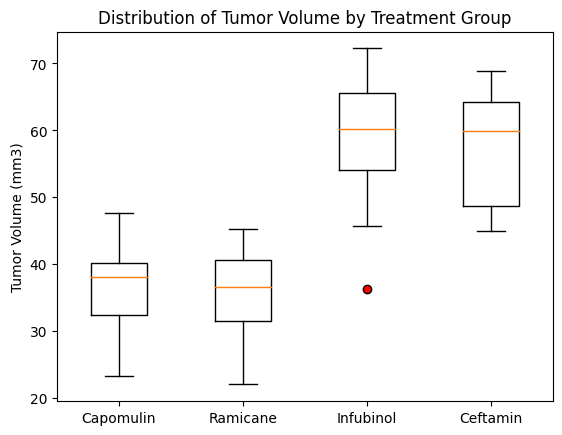

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volumes for each treatment regimen
tumor_volume_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
                     for treatment in treatments]

# Create a figure and axis for the box plot
fig, ax = plt.subplots()

# Plot the box plot
ax.boxplot(tumor_volume_data,flierprops=dict(markerfacecolor='red'))

# Set the x-axis labels
ax.set_xticklabels(treatments)

# Set the y-axis label
ax.set_ylabel('Tumor Volume (mm3)')

# Set the title of the plot
ax.set_title('Distribution of Tumor Volume by Treatment Group')

# Display the plot
plt.show()

## Line and Scatter Plots

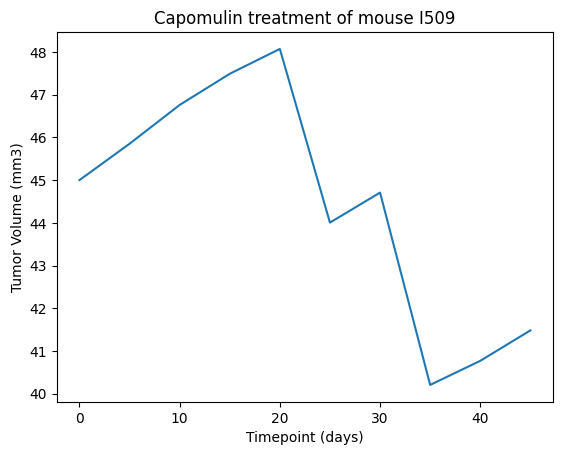

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Choose a single mouse ID treated with Capomulin
mouse_id = 'l509'

# Filter the DataFrame to include only the rows corresponding to the chosen mouse and Capomulin treatment
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == "Capomulin")]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the x-axis label
plt.xlabel('Timepoint (days)')

# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')

# Set the title of the plot
plt.title('Capomulin treatment of mouse I509')

# Display the plot
plt.show()


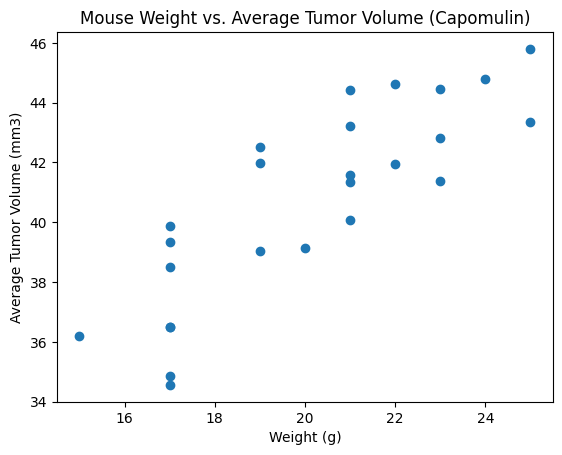

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows corresponding to the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each unique mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each unique mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Set the x-axis label
plt.xlabel('Weight (g)')

# Set the y-axis label
plt.ylabel('Average Tumor Volume (mm3)')

# Set the title of the plot
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.84
P-value: 0.00
Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.00
Standard Error: 0.13


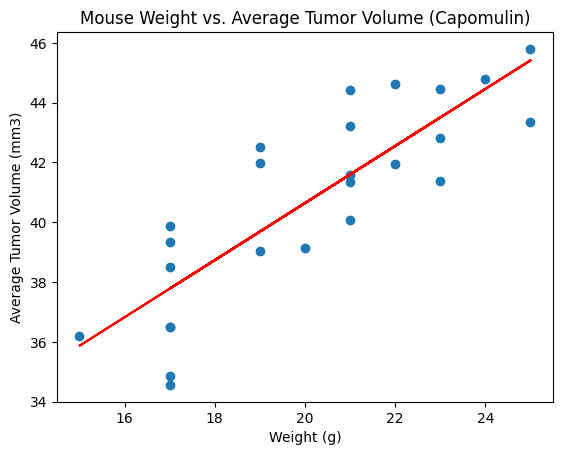

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows corresponding to the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each unique mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each unique mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(mouse_weights, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weights, average_tumor_volume)
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Create a scatter plot with linear regression line
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Add the regression line to the plot
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='red')
plt.show()
